# profit estimation of companies with linear regression

In [1]:
#importing libraries  -multiple linear regression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #visual works with matplotlib and seaborn on top of it
import pandas as pd 
#the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it.
%matplotlib inline  

### loading the dataset

In [2]:
companies = pd.read_csv('1000_Companies.csv')
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### extracting independent and dependent variables

In [3]:
X = companies.iloc[:,:-1].values #take every row except for last column
y = companies.iloc[:,4].values 
companies.head() #start with 0     y=mx+c

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### visualizing the data before processing

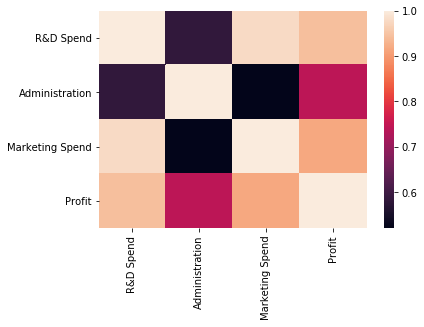

In [4]:
#Data visualisation
#Building the correlation matrix
sns.heatmap(companies.corr()) # seaborn #profit spending lighter to side


### encoding categorical data

In [5]:
#we need linear regression to encode data 
# WE are looking at all rows and take labelencoder  3 row and transform it to numbers

from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder = LabelEncoder()
X[:,3] = labelencoder.fit_transform(X[:,3])
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [3])], remainder='passthrough')
print(X)
#This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value.

[[165349.2 136897.8 471784.1 2]
 [162597.7 151377.59 443898.53 0]
 [153441.51 101145.55 407934.54 1]
 ...
 [100275.47 241926.31 227142.82 0]
 [128456.23 321652.14 281692.32 0]
 [161181.72 270939.86 295442.17 2]]


### avoiding dummy data trap

In [6]:
X = X[:,1:] #Computers automatically transform header into setup 
#When we did encoder it created 2 columns but we need one so we use this

### splitting dataset into train and test

In [7]:
from sklearn.model_selection import train_test_split  #othrwise we cant check the testing 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

#test size =0.2% meaning 20% meaning 200 lines out of 1000 for testing later
#This sets up the variables

### fitting model to training set

In [8]:
#Fitting multiple regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()  # variable and uses linear regression it has all math function
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### predicting the test dataset

In [9]:
y_pred = lin_reg.predict(X_test)
print(y_pred)

[ 90209.64901318  88876.28325862  95200.74973042 174739.58503941
  84013.74722284 110572.81423949 169438.58451208  91855.1682484
 163402.29005648  54991.76617392  67874.72481309 150180.9861358
 126512.60670878  60430.86889281 175991.46628657  76097.46542299
 118577.95366564 163338.33779446 165329.70854714 180487.66382609
 101238.40282718  86180.18269683 179933.75346041  84689.06190888
 105088.13051962 101399.34780971  40828.42858138  58070.59626831
  69777.85472814 226802.72627013 121052.52594777 111658.45981284
 101689.86321283 137852.59801618  64960.45224275 108854.95146996
 184345.94907957 170595.15880734 173725.92497117 118014.06326024
  97038.60706862 164196.76013804 107746.47058118  52030.50278345
 116882.08703837  59741.11018494 157857.27897357  79750.07622713
 159139.45816291 131182.41311202 183735.81760226 173691.52102156
  94077.16471212  79055.37228415 179193.73688257  85539.18255677
 142685.10466661 169290.41285941  84946.0123958  105424.79762652
 141471.73344522  53812.888

### finding coefficients and intercepts

In [10]:
# coefficient 
print(lin_reg.coef_)

[   1.04239904    0.35510511 -320.45531609]


In [11]:
# intercepts
print(lin_reg.intercept_)

-88623.76527343784


### evaluating the model

In [12]:
# calculating the  R squared error
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8985038788872522